In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
import warnings
warnings.filterwarnings('ignore')

# Compustat

In [3]:
compa = pd.read_csv("compa_funda_test_select_var.csv")

In [3]:
compa.head()

,gvkey,fyear,datadate,cusip,conm,fyr,aqc,at,capx,ceq,...,prcc_f,au,ggroup,gind,gsector,gsubind,incorp,state,county,addzip
0,1004,2012.0,05/31/2013,000361105,AAR CORP,5.0,21.3,2136.9,37.6,918.6,...,20.06,6.0,2010.0,201010.0,20.0,20101010.0,DE,IL,NaN,60191
1,1004,2013.0,05/31/2014,000361105,AAR CORP,5.0,15.3,2199.5,26.5,999.5,...,24.30,6.0,2010.0,201010.0,20.0,20101010.0,DE,IL,NaN,60191
2,1004,2014.0,05/31/2015,000361105,AAR CORP,5.0,1.0,1515.0,46.3,845.1,...,29.54,6.0,2010.0,201010.0,20.0,20101010.0,DE,IL,NaN,60191
3,1004,2015.0,05/31/2016,000361105,AAR CORP,5.0,0.0,1442.1,88.4,865.8,...,24.41,6.0,2010.0,201010.0,20.0,20101010.0,DE,IL,NaN,60191
4,1004,2016.0,05/31/2017,000361105,AAR CORP,5.0,12.5,1504.1,33.6,914.2,...,34.94,6.0,2010.0,201010.0,20.0,20101010.0,DE,IL,NaN,60191


In [6]:
compa.shape

(63416, 41)

In [22]:
compa.fyear.unique()

array([2012., 2013., 2014., 2015., 2016., 2017., 2018.])

In [63]:
compa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63416 entries, 0 to 63466
Data columns (total 40 columns):
gvkey       63416 non-null int64
fyear       63416 non-null float64
datadate    63416 non-null datetime64[ns]
cusip       63381 non-null object
conm        63416 non-null object
fyr         63416 non-null float64
aqc         42234 non-null float64
at          49673 non-null float64
capx        43262 non-null float64
ceq         49540 non-null float64
che         43849 non-null float64
csho        55917 non-null float64
dlc         49421 non-null float64
dltt        49532 non-null float64
dp          47155 non-null float64
dvc         48749 non-null float64
dvp         49417 non-null float64
emp         41100 non-null float64
ib          49459 non-null float64
ppent       48136 non-null float64
sale        43641 non-null float64
seq         49672 non-null float64
txdb        47889 non-null float64
xad         13892 non-null float64
xlr         17361 non-null float64
xrd         1

In [5]:
compa = compa[~compa.fyear.isna()]

In [4]:
compa.datadate = pd.DatetimeIndex(compa.datadate)
from dateutil.relativedelta import relativedelta
compa['end_date'] = compa.datadate.dt.date + relativedelta(years=1)

# 2012 - 2016

In [2]:
f13_1216= pd.read_csv('extracted13D_2012_2016.csv')

In [8]:
f13_1216.shape

(14685, 8)

In [9]:
f13_1216.head()

,CIK,Company Name,Form Type,Date Filed,Filename,Year,CIK_target,Target
0,1000184,SAP AG,SC 13D,2012-02-23,edgar/data/1000184/0001193125-12-075270.txt,2012,1402305,0
1,1001316,MANHATTAN PHARMACEUTICALS INC,SC 13D,2012-01-10,edgar/data/1001316/0001144204-12-001440.txt,2012,1001316,1
2,1001601,MGT CAPITAL INVESTMENTS INC,SC 13D,2012-01-25,edgar/data/1001601/0001144204-12-003846.txt,2012,1001601,1
3,1002517,"Nuance Communications, Inc.",SC 13D,2012-03-15,edgar/data/1002517/0001193125-12-117461.txt,2012,858452,0
4,1005758,"IO World Media, Inc",SC 13D,2012-02-01,edgar/data/1005758/0001144204-12-005261.txt,2012,1005758,1


In [3]:
ff = f13_1216[f13_1216.CIK==f13_1216.CIK_target]

In [13]:
ff.shape

(7422, 9)

In [8]:
ff['cum_acq'] = ff.groupby(['CIK','Year'])['Target'].cumsum()

In [9]:
ffu = ff[ff.cum_acq==1]

In [15]:
ffu.shape

(5101, 9)

# Merge

In [10]:
me = pd.merge(compa,ffu,how='left',left_on='cik',right_on='CIK')

In [10]:
me.head()

,gvkey,fyear,datadate,cusip,conm,fyr,aqc,at,capx,ceq,...,end_date,CIK,Company Name,Form Type,Date Filed,Filename,Year,CIK_target,Target,cum_acq
0,1004,2012.0,2013-05-31,000361105,AAR CORP,5.0,21.3,2136.9,37.6,918.6,...,2014-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1004,2013.0,2014-05-31,000361105,AAR CORP,5.0,15.3,2199.5,26.5,999.5,...,2015-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1004,2014.0,2015-05-31,000361105,AAR CORP,5.0,1.0,1515.0,46.3,845.1,...,2016-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1004,2015.0,2016-05-31,000361105,AAR CORP,5.0,0.0,1442.1,88.4,865.8,...,2017-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1004,2016.0,2017-05-31,000361105,AAR CORP,5.0,12.5,1504.1,33.6,914.2,...,2018-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
me.shape

(68084, 50)

In [11]:
me.end_date = pd.DatetimeIndex(me.end_date)
me['Date Filed'] = pd.DatetimeIndex(me['Date Filed'])

In [12]:
me['target'] = (me['Date Filed']>=me.datadate)&(me['Date Filed']<=me.end_date)

In [21]:
me.target.sum()

2809

In [21]:
me.target.value_counts()

False    65275
True      2809
Name: target, dtype: int64

In [53]:
2809/65275

0.04303332056683263

# Data cleaning for machine learning models

In [13]:
me.fillna(0,inplace=True)

In [14]:
dfd = me.drop(columns = ['target',\
                       'CIK','Company Name','Form Type','Date Filed','Filename','CIK_target','Year','Target','cum_acq',\
                      'end_date','gvkey','datadate','cusip',\
                      'conm','fyr','county','addzip','sich','naicsh','incorp',\
                      'fyear','state','au','gsector','gind','gsubind','ggroup'])

In [15]:
#normalization
from sklearn.preprocessing import scale
dfs = pd.DataFrame(scale(dfd))

In [25]:
dfs.shape

(68084, 23)

In [16]:
dfdum = me.loc[:,['fyear','state','au','gsector','gind','gsubind','ggroup']]

In [17]:
dfm= pd.concat([dfs,dfdum],axis=1, join_axes=[dfs.index])

In [28]:
dfm.shape

(68084, 30)

In [20]:
#get dummies
dfm = pd.get_dummies(dfm,columns=['fyear','state','au','gsector','gind','gsubind','ggroup'])

In [30]:
dfm.shape

(68084, 399)

PCA

In [18]:
from sklearn import decomposition

In [21]:
pca = decomposition.PCA(n_components=50)
pca.fit(dfm)
R = pca.transform(dfm)
print(R.shape)

(68084, 50)


In [21]:
pca.explained_variance_ratio_

array([0.28603183, 0.09405934, 0.05557524, 0.05046558, 0.04736347,
       0.03623506, 0.03419648, 0.03048374, 0.02811791, 0.0235764 ,
       0.02112254, 0.01735084, 0.01670296, 0.01594085, 0.01388994,
       0.01176646, 0.01129486, 0.00849687, 0.00797361, 0.00746591,
       0.00711318, 0.00699736, 0.00684508, 0.00671618, 0.00656882,
       0.00625677, 0.00609391, 0.00598718, 0.00498754, 0.00484507,
       0.00431412, 0.00421332, 0.00414678, 0.0039361 , 0.00387576,
       0.00379011, 0.00368583, 0.00338904, 0.00323593, 0.00295908,
       0.00290048, 0.00272105, 0.00237119, 0.0023253 , 0.00223927,
       0.00215752, 0.0019979 , 0.00177769, 0.00175316, 0.00170312])

In [22]:
a=[0.28603183, 0.09405934, 0.05557524, 0.05046558, 0.04736347,
       0.03623506, 0.03419648, 0.03048374, 0.02811791, 0.0235764 ,
       0.02112254, 0.01735084, 0.01670296, 0.01594085, 0.01388994,
       0.01176646, 0.01129486, 0.00849687, 0.00797361, 0.00746591,
       0.00711318, 0.00699736, 0.00684508, 0.00671618, 0.00656882,
       0.00625677, 0.00609391, 0.00598718, 0.00498754, 0.00484507,
       0.00431412, 0.00421332, 0.00414678, 0.0039361 , 0.00387576,
       0.00379011, 0.00368583, 0.00338904, 0.00323593, 0.00295908,
       0.00290048, 0.00272105, 0.00237119, 0.0023253 , 0.00223927,
       0.00215752, 0.0019979 , 0.00177769, 0.00175316, 0.00170312]

In [23]:
sum(a)

0.94001373

In [1]:
#print(pd.DataFrame(pca.components_,columns=dfm.columns))

# Models

In [22]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn import preprocessing

In [41]:
X = R
Y = me.target

In [42]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [44]:
## Keep original training data before SMOTE
x_train0 = x_train
y_train0 = y_train

SMOTE

In [26]:
from imblearn.combine import SMOTEENN

In [48]:
#smote
sme = SMOTEENN()
x_train, y_train = sme.fit_sample(x_train, y_train)

unique(y_train, return_counts=True)

(array([False,  True]), array([38454, 41934]))

## LogisticRegression

Use data before SMOTE

In [45]:
from sklearn.linear_model import LogisticRegression
logi0 = LogisticRegression()
logi0.fit(x_train0, y_train0)

pred_logi0 = logi.predict(x_train0)
prob_logi0 = logi.predict_proba(x_train0)
roc_auc_score(y_train0, prob_logi0[:, 1])

0.8266818569305748

In [46]:
print(confusion_matrix(y_train0,pred_logi0))

[[45706     0]
 [ 1952     0]]


In [47]:
print(classification_report(y_train0,pred_logi0))

              precision    recall  f1-score   support

       False       0.96      1.00      0.98     45706
        True       0.00      0.00      0.00      1952

   micro avg       0.96      0.96      0.96     47658
   macro avg       0.48      0.50      0.49     47658
weighted avg       0.92      0.96      0.94     47658



Use data after SMOTE

In [49]:
logi = LogisticRegression()
logi.fit(x_train, y_train)

pred_logi = logi.predict(x_test)
prob_logi = logi.predict_proba(x_test)
roc_auc_score(y_test, prob_logi[:, 1])

0.8122751240218542

In [50]:
print(confusion_matrix(y_test,pred_logi))

[[12730  6839]
 [  118   739]]


In [51]:
print(classification_report(y_test,pred_logi))

              precision    recall  f1-score   support

       False       0.99      0.65      0.79     19569
        True       0.10      0.86      0.18       857

   micro avg       0.66      0.66      0.66     20426
   macro avg       0.54      0.76      0.48     20426
weighted avg       0.95      0.66      0.76     20426



In [27]:
from sklearn.metrics import roc_curve, auc

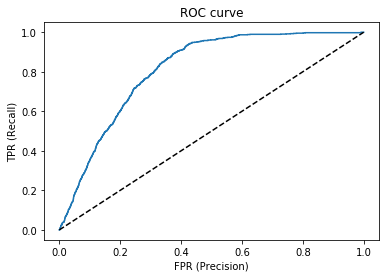

Area under curve (AUC):  0.8117537364272416


In [28]:
#ROC, AUC
fpr, tpr, _ = roc_curve(y_test,prob_logi[:, 1])

title('ROC curve')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))

## SVM

In [49]:
from sklearn import svm
models = svm.SVC(probability=True)
models.fit(x_train, y_train)

pred_svm = models.predict(x_test)
prob_svm = models.predict_proba(x_test)
roc_auc_score(y_test, prob_svm[:, 1])

0.8061717169530811

In [42]:
print(classification_report(y_test,pred_svm))

              precision    recall  f1-score   support

       False       0.99      0.63      0.77     19569
        True       0.10      0.91      0.18       857

   micro avg       0.64      0.64      0.64     20426
   macro avg       0.55      0.77      0.47     20426
weighted avg       0.96      0.64      0.75     20426



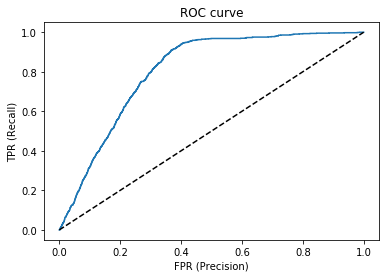

Area under curve (AUC):  0.8061717169530811


In [50]:
fpr, tpr, _ = roc_curve(y_test, prob_svm[:, 1])

title('ROC curve')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))

Bayes

In [86]:
from sklearn.naive_bayes import GaussianNB as NB
modelnb = NB()
modelnb.fit(x_train, y_train)

pred_nb = modelnb.predict(x_test)

print(classification_report(y_test,pred_nb))

              precision    recall  f1-score   support

       False       0.99      0.21      0.35     19569
        True       0.05      0.94      0.09       857

   micro avg       0.24      0.24      0.24     20426
   macro avg       0.52      0.58      0.22     20426
weighted avg       0.95      0.24      0.33     20426



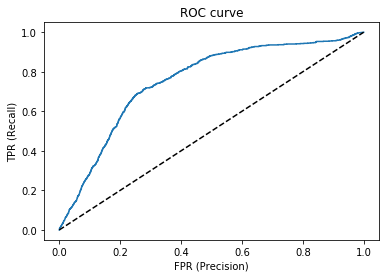

Area under curve (AUC):  0.7531386859398808


In [87]:
y_score = modelnb.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

title('ROC curve')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))

RandomForest

In [88]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(x_train,y_train)

pred_ranf = clf.predict(x_test)

print(classification_report(y_test,pred_ranf))

              precision    recall  f1-score   support

       False       0.97      0.89      0.93     19569
        True       0.13      0.38      0.19       857

   micro avg       0.86      0.86      0.86     20426
   macro avg       0.55      0.63      0.56     20426
weighted avg       0.93      0.86      0.90     20426



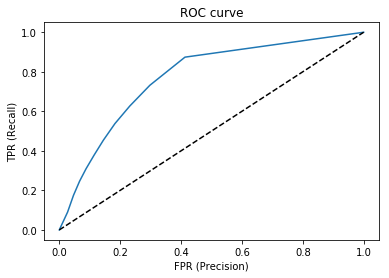

Area under curve (AUC):  0.7704487958206467


In [89]:
y_score = clf.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

title('ROC curve')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))